In [18]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 波士顿房价数据
housing_data = datasets.load_boston()

In [5]:
# 随机混合
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

In [9]:
num_training = int(0.8*len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [13]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

ad_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ad_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [14]:
y_pred_dt = dt_regressor.predict(X_test)
mes = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)

print("Decision Tree performance:")
print("Mean Squared error:", round(mes,2))
print("Explained Variance score:", round(evs, 2))

Decision Tree:
Mean Squared error: 14.79
Explained Variance score: 0.82


In [15]:
y_pred_ad = ad_regressor.predict(X_test)
mes = mean_squared_error(y_test, y_pred_ad)
evs = explained_variance_score(y_test, y_pred_ad)

print("AdaBoost performance:")
print("Mean Squared error:", round(mes,2))
print("Explained Variance score:", round(evs, 2))

Decision Tree:
Mean Squared error: 7.66
Explained Variance score: 0.91


In [19]:
def plot_feature_importances(feature_importances, title, feature_names):
    # 特征标准化
    feature_importances = 100.0*(feature_importances/max(feature_importances))
    # 将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
    
    pos = np.arange(index_sorted.shape[0]) + 0.5
    
    # plot
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align="center")
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel("Relative Importance")
    plt.title(title)
    plt.show()

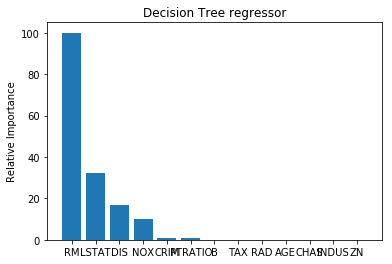

In [20]:
plot_feature_importances(dt_regressor.feature_importances_, "Decision Tree regressor", housing_data.feature_names)

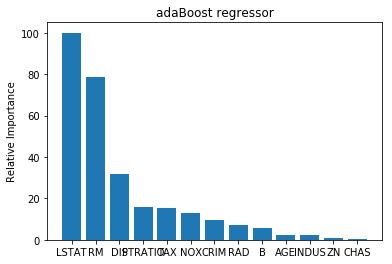

In [21]:
plot_feature_importances(ad_regressor.feature_importances_, "adaBoost regressor", housing_data.feature_names)